In [3]:
import numpy as np
import matplotlib.pyplot as plt

from transmon_model import Transmon, frequency_model_fit

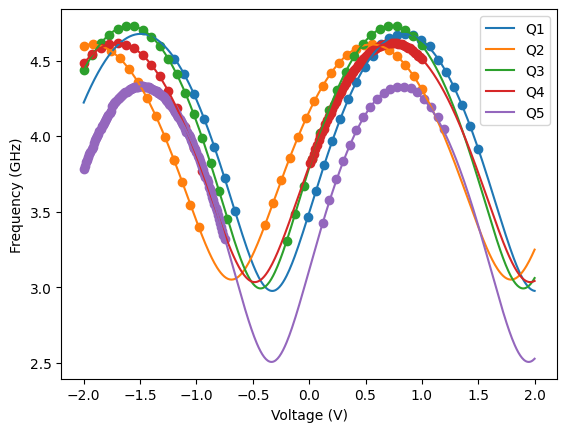

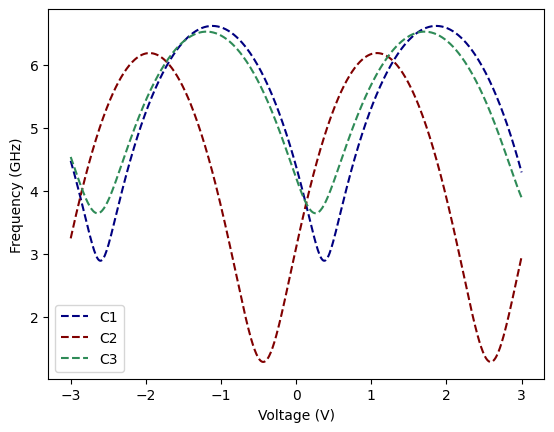

In [4]:
qubit_params_dir = r'V:\QSimMeasurements\Measurements\5QV3_Triangle_Lattice\qubit_parameters'

Q1 = Transmon(np.load(fr'{qubit_params_dir}\Q1.transmon_popt.npy'), 'Q1')
Q2 = Transmon(np.load(fr'{qubit_params_dir}\Q2.transmon_popt.npy'), 'Q2')
Q3 = Transmon(np.load(fr'{qubit_params_dir}\Q3.transmon_popt.npy'), 'Q3')
Q4 = Transmon(np.load(fr'{qubit_params_dir}\Q4.transmon_popt.npy'), 'Q4')
Q5 = Transmon(np.load(fr'{qubit_params_dir}\Q5.transmon_popt.npy'), 'Q5')
C1 = Transmon(np.load(fr'{qubit_params_dir}\C1.transmon_popt.npy'), 'C1')
C2 = Transmon(np.load(fr'{qubit_params_dir}\C2.transmon_popt.npy'), 'C2')
C3 = Transmon(np.load(fr'{qubit_params_dir}\C3.transmon_popt.npy'), 'C3')

transmon_dict = {'Q1': Q1, 'Q2': Q2, 'Q3': Q3, 'Q4': Q4, 'Q5': Q5 ,'C1': C1, 'C2': C2, 'C3': C3}

for varname in ['V1', 'V2', 'V3', 'V4', 'V5', 'freq1', 'freq2', 'freq3', 'freq4', 'freq5']:
    file = fr'{qubit_params_dir}\{varname}.npy'
    exec(fr"{varname}=np.load(file)")

Vs = np.linspace(-2, 2, 501)
for V, freq, Q in zip([V1, V2, V3, V4, V5], [freq1, freq2, freq3, freq4, freq5], [Q1, Q2, Q3, Q4, Q5]):
    plt.scatter(V, freq)
    plt.plot(Vs, frequency_model_fit(Vs, *Q.transmon_popt), label=Q.name)
plt.xlabel("Voltage (V)")
plt.ylabel("Frequency (GHz)")
plt.legend()
plt.show()

Vs = np.linspace(-3, 3, 501)
for Q, color in zip([C1,C2, C3], ['navy', 'maroon', 'seagreen']):
    plt.plot(Vs, frequency_model_fit(Vs, *Q.transmon_popt), label=Q.name, ls='--', color=color)
plt.xlabel("Voltage (V)")
plt.ylabel("Frequency (GHz)")
plt.legend()
plt.show()

In [19]:
2.3*0.7/2

0.8049999999999999

In [5]:
def flux_to_voltage(flux_vector):
    return crosstalk_inverse @ (flux_vector + crosstalk_offset * np.diag(crosstalk_matrix) )
    
def voltage_to_flux(voltage_vector):
    return crosstalk_matrix @ voltage_vector - crosstalk_offset * np.diag(crosstalk_matrix)

In [6]:
iteration = 2

crosstalk_directory= r'V:\QSimMeasurements\Measurements\5QV3_Triangle_Lattice\crosstalk'

crosstalk_matrix = np.genfromtxt(fr'{crosstalk_directory}\crosstalk_matrix_{iteration}.csv', delimiter=',')
crosstalk_offset = np.genfromtxt(fr'{crosstalk_directory}\offsets_{iteration}.csv', delimiter=',')
try:
    crosstalk_inverse = np.genfromtxt(fr'{crosstalk_directory}\inverse_matrix{iteration}.csv', delimiter=',')
except FileNotFoundError:
    crosstalk_inverse = np.linalg.inv(crosstalk_matrix)

print(np.round(crosstalk_matrix, 4))
# print(np.round(crosstalk_inverse, 4))
print(np.round(crosstalk_offset, 4))


[[ 0.4283 -0.0089  0.0094 -0.0106  0.0124  0.0039 -0.0096  0.0118]
 [ 0.0077  0.4032  0.0074 -0.0088  0.0057  0.0076 -0.0016  0.0067]
 [-0.008  -0.0059  0.4291 -0.0017  0.0016 -0.0113 -0.0052  0.0026]
 [ 0.0043  0.0075 -0.0017  0.4092 -0.004   0.003   0.0115 -0.003 ]
 [-0.0079 -0.0041 -0.0134  0.0071  0.4383 -0.0101 -0.0017 -0.018 ]
 [ 0.0072  0.0047 -0.0065  0.005  -0.0057  0.3357  0.0049 -0.0047]
 [ 0.0041  0.0076  0.002  -0.0045  0.0006  0.0039  0.3304  0.0021]
 [ 0.006   0.0026  0.0092 -0.0046  0.0029  0.0075  0.0028  0.3446]]
[0.8432 0.5691 0.7559 0.7213 0.8435 1.8996 1.0628 1.6704]


In [12]:
initial_voltages = [ 0.81378277, -0.69906829, -0.40077118, -0.48958588, -0.27726668,  0.40701021, -0.45454816,  0.21204609]
initial_voltages = [0, 0, 0, 0, 0, 0.5, -0.5, 0.4]
# initial_voltages = [1, 1, 1, 1, -1, 0.5, -0.5, 0.4]

initial_fluxes = voltage_to_flux(initial_voltages)
print(np.round(initial_fluxes, 4))

[-0.3497 -0.2221 -0.3264 -0.3005 -0.3811 -0.4742 -0.5136 -0.4355]


In [13]:
for i in range(5):
    transmon = transmon_dict[f'Q{i+1}']
    print(f'Q{i+1}: {np.round(transmon.freq(initial_fluxes[i]), 3)*1e3} MHz')

Q1: 3551.0 MHz
Q2: 4161.0 MHz
Q3: 3725.0 MHz
Q4: 3811.0 MHz
Q5: 2948.0 MHz


In [9]:
Q2.freq(0)

4.606880866658877

In [17]:
qubit_target_frequencies = np.array([4.275, 3.5, 3.5, 3.5, 3.5])

qubit_fluxes = np.zeros(8)
for i in range(len(qubit_target_frequencies)):
    transmon = transmon_dict[f'Q{i+1}']
#     print(i)
    qubit_fluxes[i] = transmon.flux(qubit_target_frequencies[i])
    
qubit_fluxes[5:] = [-0.5, -0.5, -0.5]
# qubit_fluxes[0] = 0

voltages = flux_to_voltage(qubit_fluxes)

print('voltages = [', end='')
for i in range(len(voltages)-1):
    print(f'{np.round(voltages[i], 3)}, ', end='')
print(f'{np.round(voltages[-1], 3)}]')




voltages = [1.286, 1.414, 1.656, 1.598, 1.573, 0.407, -0.496, 0.146]


In [11]:

qubit_fluxes = np.array([0, 0, 0, 0, 0, 0.5, 0.5, 0.5])

qubit_frequencies = np.zeros(8)
for i in range(len(qubit_fluxes)):
    if i < 5:
        transmon = transmon_dict[f'Q{i+1}']
    else:
        transmon = transmon_dict[f'C{i-4}']
    qubit_frequencies[i] = transmon.freq(qubit_fluxes[i])
    
print(f'frequencies: {np.round(qubit_frequencies, 3)} GHz')

voltages = flux_to_voltage(qubit_fluxes)

print('voltages = [', end='')
for i in range(len(voltages)-1):
    print(f'{np.round(voltages[i], 3)}, ', end='')
print(f'{np.round(voltages[-1], 3)}]')




frequencies: [4.677 4.607 4.729 4.617 4.33  2.887 1.28  3.643] GHz
voltages = [0.76, 0.433, 0.876, 0.646, 1.088, 3.398, 2.499, 2.986]
